In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file
data = pd.read_csv('fs15_output.csv')

# 2. Tách features và label
X = data.drop('Label', axis=1)  # Thay 'Label' bằng tên cột nhãn thực tế nếu khác
y = data['Label']

# 3. Tính toán tỷ lệ sampling_strategy
count_1 = sum(y == 1)
desired_count_0 = 2 * count_1  # Nhãn 0 = 2 lần nhãn 1
count_0 = sum(y == 0)

# 4. Áp dụng RandomUnderSampler
sampling_strategy = {0: desired_count_0}  # Giữ lại số lượng nhãn 0 mong muốn
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# 5. Ghép lại thành DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Label'] = y_resampled

# 6. Lưu ra file
resampled_data.to_csv('undersampled_output.csv', index=False)

# 7. In thông tin kiểm tra
print(f"Trước Undersampling - Số lượng mẫu nhãn 0: {count_0}, nhãn 1: {count_1}")
print(f"Sau Undersampling - Số lượng mẫu nhãn 0: {sum(y_resampled == 0)}, nhãn 1: {sum(y_resampled == 1)}")
print(f"Đã lưu dữ liệu đã cân bằng vào undersampled_output.csv")

Trước Undersampling - Số lượng mẫu nhãn 0: 4889730, nhãn 1: 1325843
Sau Undersampling - Số lượng mẫu nhãn 0: 2651686, nhãn 1: 1325843
Đã lưu dữ liệu đã cân bằng vào undersampled_output.csv


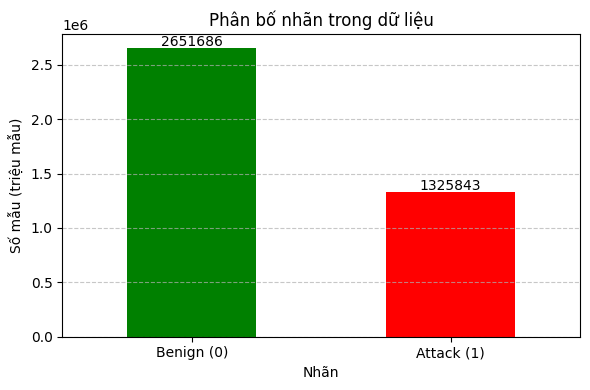

In [2]:
df = pd.read_csv("undersampled_output.csv")
total_samples = len(df)
label_counts = df['Label'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['green', 'red'])

# Tùy chỉnh biểu đồ
plt.title("Phân bố nhãn trong dữ liệu")
plt.xlabel("Nhãn")
plt.ylabel("Số mẫu (triệu mẫu)")
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Attack (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số trên cột
for i, count in enumerate(label_counts):
    plt.text(i, count + total_samples * 0.005, str(count), ha='center')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()